In [1]:
import random as r
import numpy as np
from matplotlib import pyplot as plt

### Sampling from Exponential Distribution
* Use inversion method to simulate esponential distribution.
* Check that empirical standard deviation and mean converge to that of analytical.

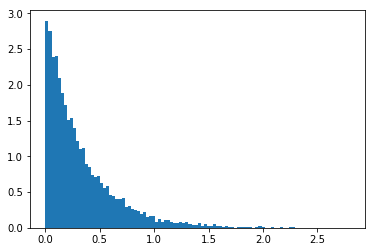

In [2]:
uni = np.random.rand(10000)

# the exponential has mean 1 / lamb, std 1 / lamb
lamb = 3
expo = - (1 / lamb) * np.log(1 - uni)
plt.hist(expo, bins = 100, density=True)
plt.show()

In [3]:
def draw_sample_with_size(sample_size, silent=True):
    sample = [r.choice(expo) for _ in range(sample_size)]
    if not silent:
        print("""
        sample mean: %.2f
        analytical mean: %.2f
        empirical std: %.2f
        analytical std: %.2f
        """ % (np.mean(sample), 1 / lamb, np.std(sample), 1 / lamb))
    return sample

In [4]:
_ = draw_sample_with_size(sample_size=10, silent=False)


        sample mean: 0.45
        analytical mean: 0.33
        empirical std: 0.33
        analytical std: 0.33
        


In [5]:
# good convergence to analytical values
_ = draw_sample_with_size(sample_size=1000, silent=False)


        sample mean: 0.32
        analytical mean: 0.33
        empirical std: 0.32
        analytical std: 0.33
        


#### Sampling distribution of exponential distribution
* Sampling statistic follows normal distribution (when sample size is large).
* Standard error decreases as sample size increases.

In [6]:
def sampling_distribution(sample_size=100, n_trial=100, silent=True):
    sample_means = [np.mean(draw_sample_with_size(sample_size=sample_size)) for _ in range(n_trial)]

    analytical_mean = (1 / lamb)
    empirical_mean = np.mean(sample_means)

    analytical_se = (1 / lamb) / np.sqrt(sample_size)
    empirical_se = np.std(sample_means)
    
    if not silent:
        print("""
        sampling distribution
        analytical mean: %.2f
        empirical mean: %.2f
        analytical se: %.2f
        empirical se: %.2f
        """%(analytical_mean, empirical_mean, analytical_se, empirical_se))
    
    normal = np.random.normal(analytical_mean, analytical_se, n_trial)
    plt.hist(sample_means, bins=100, density=True, alpha=0.5)
    plt.hist(normal, bins=100, density=True, alpha=0.5)
    plt.legend(["sampling dist", "normal dist"])
    plt.show()


        sampling distribution
        analytical mean: 0.33
        empirical mean: 0.33
        analytical se: 0.24
        empirical se: 0.23
        


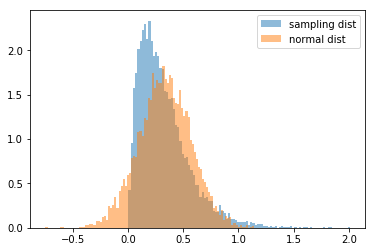

In [7]:
sampling_distribution(sample_size=2, n_trial=10000, silent=False)


        sampling distribution
        analytical mean: 0.33
        empirical mean: 0.33
        analytical se: 0.15
        empirical se: 0.15
        


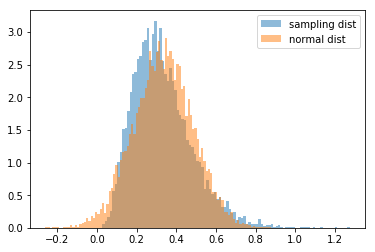

In [8]:
sampling_distribution(sample_size=5, n_trial=10000, silent=False)


        sampling distribution
        analytical mean: 0.33
        empirical mean: 0.33
        analytical se: 0.11
        empirical se: 0.10
        


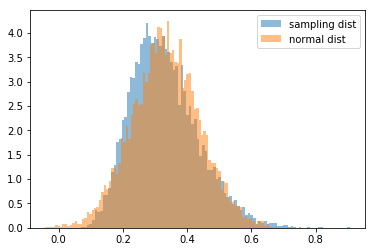

In [9]:
sampling_distribution(sample_size=10, n_trial=10000, silent=False)


        sampling distribution
        analytical mean: 0.33
        empirical mean: 0.33
        analytical se: 0.03
        empirical se: 0.03
        


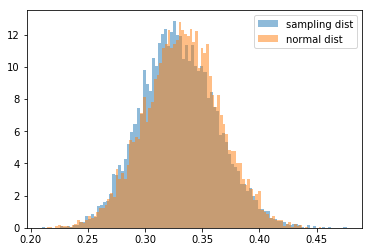

In [10]:
sampling_distribution(sample_size=100, n_trial=10000, silent=False)